In [1]:
#Imports
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn import tree
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generate Data
X,y = datasets.make_moons(n_samples=10000, noise=0.4)

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
#grid search for single decision tree

param_grid = [
    {'max_leaf_nodes': [2,4,6], 'max_depth': [2,4,6]}
]

folds = 10

dec_tree_clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(dec_tree_clf, param_grid, cv=folds)

grid_search.fit(X_train,y_train)

print("best params:")
print(grid_search.best_params_)
print("best score:")
print(grid_search.best_score_)

best params:
{'max_depth': 2, 'max_leaf_nodes': 4}
best score:
0.8514999999999999


Text(0.5, 1.0, 'Decision Tree')

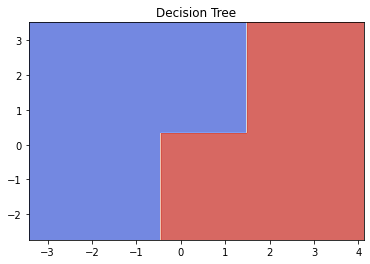

In [15]:
# Plot Classifier Results

#testing data
X0 = X_test[y_test==0]
X1 = X_test[y_test==1]

# create meshgrid for plotting
h = 0.02 #step size of mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#predict classes using sklearn kernel SVM classifier
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])

# contour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X0[:, 0], X0[:, 1], marker='v', alpha=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', alpha=0.2)
plt.title('Decision Tree')

In [19]:
#Random Forest

rs = ShuffleSplit(n_splits=1000, train_size=100, test_size=100, random_state=None)

#list of scores of individual decision trees
scores = []
#list of predictions of individual trees
y_pred = []
#list of decision trees
dtrees = []

#train the trees using split data
for train_index, test_index in rs.split(X_train):
    
    #create decision tree classifier & fit to split training set
    _dtree = tree.DecisionTreeClassifier()
    _dtree.fit(X_train[train_index],y_train[train_index])
    dtrees.append(_dtree)
    
    #compute the score of this tree for the test set
    scores.append(_dtree.score(X_test,y_test))
    
    #predict the class for the test set
    y_pred.append(_dtree.predict(X_test))
    
print("maximum score: ", max(scores))
print("minimum score: ", min(scores))
print("mean score: ", np.mean(scores))

#majority voting of predictions
result,count = stats.mode(np.asarray(y_pred).T,axis=1)
rf_accuracy = accuracy_score(y_test,result.flatten())
print("random forest accuracy: ", rf_accuracy)

maximum score:  0.8505
minimum score:  0.6965
mean score:  0.7872680000000001
random forest accuracy:  0.86


In [30]:
def predict_scratch(x,dtrees):
    y_pred = []
    for _dtree in dtrees:
        y_pred.append(_dtree.predict(x))
        
    result,count = stats.mode(np.asarray(y_pred).T,axis=1)
    return result.flatten()

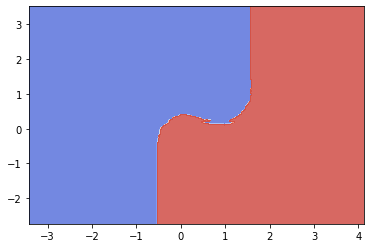

In [31]:
#predict classes using sklearn kernel SVM classifier
Z = predict_scratch(np.c_[xx.ravel(), yy.ravel()],dtrees)

# contour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)